In [2]:
# importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Coloque o caminho do arquivo csv para rodar o programa
caminho_arquivo = '/content/drive/MyDrive/google/Colab Notebooks/turing/Projeto 1: Análise e Limpeza de Dados/df_athlete_events.csv'
df = pd.read_csv(caminho_arquivo)


# Estrutura dos dados

In [4]:
df.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45567 entries, 0 to 45566
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete_ID  45567 non-null  int64  
 1   Name        45567 non-null  object 
 2   Sex         45567 non-null  object 
 3   Age         44594 non-null  float64
 4   Height      35547 non-null  float64
 5   Weight      34926 non-null  object 
 6   Team        45567 non-null  object 
 7   NOC         45567 non-null  object 
 8   Games       45567 non-null  object 
 9   Year        45567 non-null  int64  
 10  Season      45567 non-null  object 
 11  City        45567 non-null  object 
 12  Sport       45567 non-null  object 
 13  Event       45567 non-null  object 
 14  Medal       39804 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 5.2+ MB


In [6]:
df.describe()

,Athlete_ID,Age,Height,Year
count,45567.000000,44594.000000,3.554700e+04,45567.000000
mean,69129.286282,25.851348,9.729939e+02,1972.391094
std,38866.485546,5.966053,3.446781e+04,94.200678
min,4.000000,10.000000,1.320000e+02,-2992.000000
25%,36105.500000,22.000000,1.700000e+02,1952.000000
50%,68634.000000,25.000000,1.780000e+02,1984.000000
75%,103181.000000,29.000000,1.850000e+02,2002.000000
max,135563.000000,73.000000,1.976779e+06,2016.000000


In [7]:
df.describe(include=['object'])

,Name,Sex,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
count,45567,45567,34926,45567,45567,45567,45567,45567,45567,45567,39804
unique,32905,6,188,602,201,51,5,43,66,760,4
top,"Michael Fred Phelps, II",M,70.0,United States,USA,2008 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,28,31664,1443,5515,5957,2321,38607,4091,4811,1379,13320


In [8]:
# cria coluna 'Decade' com a década da participação do atleta
df['Decade'] = (df['Year']//10) * 10
df_1890 = df[df.Year == 1890]
df_1900 = df[df.Year == 1900]
df_1910 = df[df.Year == 1910]
df_1920 = df[df.Year == 1920]
df_1930 = df[df.Year == 1930]
df_1940 = df[df.Year == 1940]
df_1950 = df[df.Year == 1950]
df_1960 = df[df.Year == 1960]
df_1970 = df[df.Year == 1970]
df_1980 = df[df.Year == 1980]
df_1990 = df[df.Year == 1990]
df_2000 = df[df.Year == 2000]
df_2010 = df[df.Year == 2010]

# Limpeza coluna 'Sex'

In [9]:
df.Sex.describe()

count     45567
unique        6
top           M
freq      31664
Name: Sex, dtype: object

In [10]:
# printa os diferentes valores contidos na coluna 'Sex'
print(pd.Series(df['Sex'].unique()), end='\n\n')

0                          M
1                       MALE
2                     FEMALE
3                          F
4    Vic vai te dar um socao
5          P&D >> Comunidade
dtype: object



In [11]:
# remove as fileiras que contem valores inconcistentes para 'Sex'
df = df[df.Sex !=  'P&D >> Comunidade']
df = df[df.Sex !=  'Vic vai te dar um socao']

In [12]:
# padroniza os strings de identificação dos sexos masculino e feminino
df.replace(to_replace='M', value='MALE', inplace=True)
df.replace(to_replace='F', value='FEMALE', inplace=True)


In [13]:
# verifica se a limpeza realizada deu certo
print(pd.Series(df['Sex'].unique()), end='\n\n')
print("numero de homens é ", len(df[df['Sex']=="MALE"]))
print("numero de mulheres é ", len(df[df['Sex']=="FEMALE"]))

0      MALE
1    FEMALE
dtype: object

numero de homens é  32429
numero de mulheres é  12493


In [14]:
# verifica existênciade valores faltante na coluna 'Sex'
df.Sex.isna().sum()

0

# Limpeza coluna 'Age'


In [15]:
# printa os diferentes valores contidos na coluna 'Age'
print(df['Age'].unique(), end='\n\n')

[34. 31. 30. 28. 32. 20. 22. 27. 24. 23. 25. 21. 26. 38. 29. 33. nan 41.
 35. 19. 36. 15. 17. 16. 18. 43. 37. 45. 39. 53. 47. 44. 49. 40. 52. 14.
 54. 48. 46. 56. 42. 58. 13. 70. 60. 50. 51. 62. 57. 61. 66. 55. 65. 73.
 12. 72. 68. 59. 11. 69. 63. 64. 10. 71.]



In [16]:
# remove todas as linhas cujas idades não pertecem ao intervalo entre 13 e 66 anos, as idades maxima e minim de atletas olimpicos
for i in range(10, 13):
  df = df[df.Age != i]
for i in range(67, 74):
  df = df[df.Age != i]


In [17]:
# a descrição da feature Age nos mostra que todas as idades obedecem o intervalo estabelecido
df['Age'].describe()

count    43936.000000
mean        25.855699
std          5.930233
min         13.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         66.000000
Name: Age, dtype: float64

In [18]:
# insere nos valores faltantes a media de idade do dataframe
df.Age.fillna(df.Age.mean(), inplace=True)

# Limpeza coluna 'Weight'

In [19]:
# descrição da coluna 'Weight' nos mostra que tipo dos valores é object e nao float
df.Weight.describe()

count     34396
unique      187
top        70.0
freq       1421
Name: Weight, dtype: object

In [20]:
# printa os diferentes valores contidos na coluna 'Weight'
df.Weight.unique()

array([nan, '75.0', '85.0', '64.0', '90.0', '87.0', '49.0', 'hsuahusahu',
       '76.0', '83.0', '86.0', '82.0', '55.0', '67.0', '60.0', '79.0',
       '96.0', '97.0', '70.0', '88.0', '56.0', '80.0', '59.0', '91.0',
       '72.0', '62.0', '63.0', '130.0', '104.0', '73.0', '84.0', '125.0',
       '50.0', '102.0', '48.0', '58.0', '78.0', '40.0', '68.0', '92.0',
       '61.0', '95.0', '89.0', '65.0', '93.0', '77.0', '46.0', '81.0',
       '52.0', '54.0', '57.0', '69.0', '99.0', '69.5', '51.0', '120.0',
       '74.0', '110.0', '100.0', '66.0', '47.0', '116.0', '107.0', '53.0',
       '105.0', '109.0', '156.0', '71.0', '98.0', '160.0', '106.0',
       '146.0', '44.0', '138.0', '141.0', '94.0', '118.0', '101.0',
       '39.0', '32.0', '112.0', '115.0', '74.5', '121.0', '135.0',
       '111.0', '43.0', '36.0', '67.5', '45.0', '114.0', '132.0', '65.5',
       '42.0', '59.5', '127.5', '108.0', '35.0', '117.0', '103.0', '58.5',
       '214.0', '113.0', '146.5', '116.5', '140.0', '38.0', '101.5',

In [21]:
# remove o valor incoerente encontrado no ndarray acima
df = df[df['Weight'] != 'hsuahusahu']


In [22]:
# converte o tipo dos valores de 'Weight' para float
df["Weight"] = pd.to_numeric(df["Weight"], downcast="float")

In [23]:
# insere a media de pesos nas fileiras com valores faltantes
df['Weight'].fillna(df.Weight.mean(), inplace=True)

In [24]:
# com o tipo float a descricao da coluna fica mais detalhada e percebemos valores coerentes de maximo e minimo
df.Weight.describe()

count    44415.000000
mean        73.524292
std         13.086416
min         28.000000
25%         66.000000
50%         73.530113
75%         79.000000
max        214.000000
Name: Weight, dtype: float64

# Limpeza coluna 'Height'

In [25]:
df.Height.describe()

count    3.455700e+04
mean     9.340258e+02
std      3.343668e+04
min      1.320000e+02
25%      1.700000e+02
50%      1.780000e+02
75%      1.850000e+02
max      1.976779e+06
Name: Height, dtype: float64

In [26]:
# remove todas as linhas cujas alturas não pertecem ao intervalo entre 130 e 250 centimetros
df = df[df.Height > 130]
df = df[df.Height < 250]


In [27]:
# descricao das alturas mostra valores coerentes de maximo e minimo
df.Height.describe()

count    34535.000000
mean       177.340321
std         10.856361
min        132.000000
25%        170.000000
50%        178.000000
75%        185.000000
max        223.000000
Name: Height, dtype: float64

In [28]:
# insere a media de alturas onde ha dados faltantes de altura
df.Height.fillna(df.Height.mean(), inplace=True)

# Limpeza coluna 'Team'

In [29]:
# printa os diferentes valores contidos na coluna 'Team'
print(df.Team.unique())

['United States' 'Finland' 'Norway' 'Italy' 'Spain' 'Azerbaijan'
 'Argentina' 'Belarus' 'France' 'Cameroon' 'Russia' 'Hungary' 'Australia'
 'Iran' 'Canada' 'Pakistan' 'Soviet Union' 'Uzbekistan' 'Tajikistan'
 'Unified Team' 'Japan' 'East Germany' 'Germany' 'Ethiopia' 'Sweden'
 'Turkey' 'Bulgaria' 'Egypt' 'Great Britain' 'Djibouti' 'Jordan' 'Romania'
 'Switzerland' 'Puerto Rico' 'Venezuela' 'Mexico' 'Ghana' 'Morocco'
 'Switzerland-1' 'Switzerland-2' 'Cuba' 'Poland' 'Czechoslovakia'
 'South Africa' 'New Zealand' 'Nigeria' 'Kenya' 'Brazil' 'France-1'
 'Germany-2' 'Lithuania' 'Netherlands' 'United States-1' 'West Germany'
 'Benin' 'Panama' 'El Salvador' 'Indonesia' 'Malaysia' 'Indonesia-1'
 'Germany-1' 'South Korea' 'Mutafo' 'Chile' 'Mauritania' 'Ukraine'
 'Uganda' 'Iraq' 'Syria' 'Qatar' 'Kuwait' 'Oman' 'Palestine'
 'Individual Olympic Athletes' 'Saudi Arabia' 'United Arab Emirates'
 'Croatia' 'Colombia' 'Soviet Union-2' 'Armenia' 'Serbia' 'Monaco'
 'Iceland' 'Niger' 'Papua New Guinea' 'Su

In [30]:
# verifica existencia de dados faltantes
df.Team.isna().sum()

0

# Limpeza coluna 'NOC'

In [31]:
# printa os diferentes valores contidos na coluna 'NOC'
print(df.NOC.unique())

['USA' 'FIN' 'NOR' 'ITA' 'ESP' 'AZE' 'ARG' 'BLR' 'FRA' 'CMR' 'RUS' 'HUN'
 'AUS' 'IRI' 'CAN' 'PAK' 'URS' 'UZB' 'TJK' 'EUN' 'JPN' 'GDR' 'GER' 'ETH'
 'SWE' 'TUR' 'BUL' 'EGY' 'GBR' 'DJI' 'JOR' 'ROU' 'SUI' 'PUR' 'VEN' 'MEX'
 'GHA' 'MAR' 'CUB' 'POL' 'TCH' 'RSA' 'NZL' 'NGR' 'KEN' 'BRA' 'LTU' 'NED'
 'FRG' 'BEN' 'PAN' 'ESA' 'INA' 'MAS' 'KOR' 'CHI' 'MTN' 'UKR' 'UGA' 'IRQ'
 'SYR' 'QAT' 'KUW' 'OMA' 'PLE' 'IOA' 'KSA' 'UAE' 'CRO' 'COL' 'ARM' 'SRB'
 'MON' 'ISL' 'NIG' 'PNG' 'SUD' 'IND' 'BIH' 'ALG' 'AUT' 'JAM' 'TTO' 'CIV'
 'GRE' 'BOT' 'ROT' 'TUN' 'PRK' 'CHN' 'YUG' 'DEN' 'URU' 'MAD' 'GUY' 'KAZ'
 'IRL' 'BEL' 'IVB' 'PHI' 'DOM' 'GEO' 'EST' 'ISR' 'CZE' 'SCG' 'SVK' 'PAR'
 'BAH' 'ANZ' 'MNE' 'POR' 'GUA' 'AND' 'LUX' 'SLO' 'TAN' 'BER' 'LIB' 'MRI'
 'ALB' 'KGZ' 'BAR' 'PER' 'ANG' 'BUR' 'GAB' 'GUM' 'SRI' 'THA' 'MLT' 'TOG'
 'LAT' 'LIE' 'ZIM' 'ECU' 'SMR' 'NCA' 'HON' 'HAI' 'HKG' 'TPE' 'SGP' 'MGL'
 'ZAM' 'MDA' 'SKN' 'SAM' 'FIJ' 'SEN' 'ARU' 'CAY' 'TGA' 'ISV' 'GUI' 'NAM'
 'SUR' 'WIF' 'MHL' 'SLE' 'LES' 'VIE' 'MKD' 'BRN' 'G

In [32]:
# verifica existencia de dados faltantes
df.NOC.isna().sum()

0

# Limpeza coluna 'Games'

In [33]:
# printa os diferentes valores contidos na coluna 'Games'
print(df.Games.unique())

['1992 Winter' '2014 Winter' '1948 Summer' '1952 Summer' '1994 Winter'
 '2002 Winter' '2006 Winter' '2008 Summer' '1996 Summer' '2016 Summer'
 '2000 Summer' '2012 Summer' '2004 Summer' '1980 Summer' '1984 Summer'
 '1992 Summer' '1988 Summer' '1960 Summer' '1964 Summer' '1972 Summer'
 '1936 Summer' '1924 Winter' '1912 Summer' '1932 Summer' '1924 Summer'
 '1920 Summer' '1988 Winter' '1968 Winter' '1976 Summer' '1998 Winter'
 '2010 Winter' '1928 Summer' '1968 Summer' '1956 Summer' '1972 Winter'
 '1908 Summer' '1980 Winter' '1984 Winter' '1960 Winter' '1976 Winter'
 '1964 Winter' '1936 Winter' '1956 Winter' '1932 Winter' '1928 Winter'
 '1904 Summer' '1952 Winter' '1906 Summer' '1900 Summer' '1896 Summer'
 '1948 Winter']


In [34]:
# verifica existencia de dados faltantes
df.Games.isna().sum()

0

# Limpeza coluna 'Year'

In [35]:
# printa os diferentes valores contidos na coluna 'Year'
print(df.Year.unique())

[ 1992  2014  1948  1952  1994  2002  2006  2008  -182  2016  2000  2012
  1996  2004  1980  1984  1988  1960  1964  1972  1936  1924  1912  1932
  1920  1968  1976  1998  2010  -670  -248  -825  1928  1956  1908 -2378
 -1143 -2813 -2491  1904  1906 -1084  1900  1896 -2743 -1114 -1348 -1243
 -2023  -915 -1224 -2124  -823 -2457 -2793]


In [36]:
# descricao mostra valores negativos incoerentes
df.Year.describe()

count    34535.000000
mean      1984.711886
std         90.318269
min      -2813.000000
25%       1972.000000
50%       1992.000000
75%       2004.000000
max       2016.000000
Name: Year, dtype: float64

In [37]:
# remove do dataframe as linhas com anos negativos
df = df[df.Year > 0]

In [74]:
df.Year.describe()

count    34130.000000
mean      1986.628597
std         24.182245
min       1896.000000
25%       1972.000000
50%       1992.000000
75%       2004.000000
max       2016.000000
Name: Year, dtype: float64

In [38]:
# verifica presença de dados faltantes
df.Year.isna().sum()

0

# Limpeza coluna 'Season'

In [39]:
# printa os diferentes valores contidos na coluna 'Season'
print(df.Season.unique())

['Winter' 'Summer' '#ForaBolsonaro' 'Ele não' 'Ele nunca']


In [40]:
# remove do dataframe os valores incoerentes com a coluna 'Season'
df = df[df.Season != '#ForaBolsonaro']
df = df[df.Season != 'Ele não']
df = df[df.Season != 'Ele nunca']

In [41]:
#verifica se a remocao deu certo
print(df.Season.unique())

['Winter' 'Summer']


In [42]:
#verifica presenca de dados faltantes
df.Season.isna().sum()

0

# Limpeza coluna 'City'

In [43]:
# printa os diferentes valores contidos na coluna 'City'
print(df.City.unique())

['Albertville' 'Sochi' 'London' 'Helsinki' 'Lillehammer' 'Salt Lake City'
 'Torino' 'Beijing' 'Rio de Janeiro' 'Sydney' 'Atlanta' 'Athina' 'Moskva'
 'Los Angeles' 'Barcelona' 'Seoul' 'Roma' 'Tokyo' 'Munich' 'Berlin'
 'Chamonix' 'Stockholm' 'Paris' 'Antwerpen' 'Calgary' 'Grenoble'
 'Montreal' 'Nagano' 'Vancouver' 'Amsterdam' 'Mexico City' 'Melbourne'
 'Sapporo' 'Lake Placid' 'Sarajevo' 'Squaw Valley' 'Innsbruck'
 'Garmisch-Partenkirchen' "Cortina d'Ampezzo" '######' 'Sankt Moritz'
 'St. Louis' 'Oslo']


In [44]:
# remove o valor incoerente
df = df[df.City != '######']

In [45]:
# verifica existencia de dados faltantes
df.City.isna().sum()

0

# Limpeza coluna 'Sport'

In [46]:
# printa os diferentes valores contidos na coluna 'Sport'
print(df.Sport.unique())

['Cross Country Skiing' 'Ice Hockey' 'Gymnastics' 'Alpine Skiing'
 'Handball' 'Rowing' 'Fencing' 'Taekwondo' 'Swimming' 'Canoeing'
 'Football' 'Water Polo' 'Wrestling' 'Sailing' 'Athletics' 'Cycling'
 'Hockey' 'Figure Skating' 'Softball' 'Volleyball' 'Boxing' 'Basketball'
 'Diving' 'Freestyle Skiing' 'Baseball' 'Speed Skating' 'Nordic Combined'
 'Bobsleigh' 'Modern Pentathlon' 'Curling' 'Judo' 'Tennis' 'Shooting'
 'Badminton' 'Rugby Sevens' 'Rhythmic Gymnastics' 'Weightlifting'
 'Equestrianism' 'Beach Volleyball' 'Ski Jumping'
 'Short Track Speed Skating' 'Archery' 'Biathlon' 'Synchronized Swimming'
 'Triathlon' 'Table Tennis' 'Snowboarding' 'Skeleton' 'Luge' 'Rugby'
 'Tug-Of-War' 'Trampolining' 'Lacrosse' 'Art Competitions' 'Golf' 'Polo'
 'Racquets']


In [47]:
# verifica existencia de dados faltantes
df.Sport.isna().sum()

0

# Limpeza coluna 'Event'

In [48]:
# printa os diferentes valores contidos na coluna 'Sport'
print(df.Event.unique())

["Cross Country Skiing Men's 10/15 kilometres Pursuit"
 "Ice Hockey Men's Ice Hockey" "Gymnastics Men's Individual All-Around"
 "Gymnastics Men's Team All-Around" "Gymnastics Men's Horse Vault"
 "Gymnastics Men's Pommelled Horse" "Alpine Skiing Men's Super G"
 "Alpine Skiing Men's Giant Slalom" "Alpine Skiing Men's Downhill"
 "Alpine Skiing Men's Combined" "Handball Women's Handball"
 "Rowing Men's Coxless Pairs" "Fencing Men's epee, Individual"
 "Taekwondo Women's Flyweight" "Swimming Men's 100 metres Butterfly"
 "Canoeing Men's Kayak Fours, 1,000 metres" "Handball Men's Handball"
 "Football Men's Football" "Water Polo Men's Water Polo"
 "Wrestling Men's Featherweight, Freestyle"
 'Sailing Mixed Two Person Heavyweight Dinghy'
 "Athletics Men's 1,500 metres" "Cycling Women's Sprint"
 "Fencing Men's Sabre, Team" "Rowing Men's Quadruple Sculls"
 "Rowing Men's Double Sculls" "Rowing Men's Coxed Pairs"
 "Hockey Men's Hockey" 'Figure Skating Mixed Team'
 "Softball Women's Softball" "Taekwon

In [49]:
# verifica existencia de dados faltantes
df.Event.isna().sum()

0

# Limpeza coluna 'Medal'

In [50]:
# printa os diferentes valores contidos na coluna 'Medal'
print(df.Medal.unique())

[nan 'Bronze' 'Gold' 'Silver' 'Nelson']


In [51]:
#remove valor incoerente
df = df[df.Medal != 'Nelson']

In [52]:
# insere o string 'Loser' para quem nao ganhou medalha
df.Medal.fillna('Loser', inplace=True)

In [53]:
# verifica se a limpeza deu certo
df.Medal.unique()

array(['Loser', 'Bronze', 'Gold', 'Silver'], dtype=object)

# Análise dos atletas



Nesta seção, buscaremos analisar as características dos atletas olímpicos, com um especial enfoque para a idade, altura e peso. Essas características serão relacionadas ao resultado obtido pelos esportistas, a fim procurar algum padrão no quadro de medalhas.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


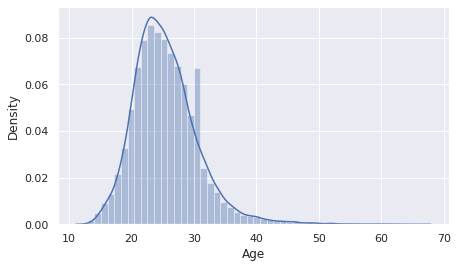

In [54]:
plt.style.use('ggplot')
sns.set(rc={"figure.figsize":(7, 4)})
sns.distplot(df.Age)

A distribuição etária apresentada acima nos mostra uma alta concentração de indivíduos com idades na faixa dos vinte aos trinta anos. Observa-se, além disso, um pico na casa dos trinta anos que foge à tendência apresentada pela linha de tendência.
Uma possível hipótese para explicar esse pico seria o fato de que muitos atletas esperam completar trinta anos para se aposentarem. Embora fisicamente o indivíduo com trinta anos não esteja tão diferente das pessoas com 29 ou 31 anos, no universo esportivo as três décadas de vida simbolizam um divisor de águas entre o auge da vitalidade e o início de um declínio da força física. Dessa forma, os atletas ficam 'represados' nessa idade. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


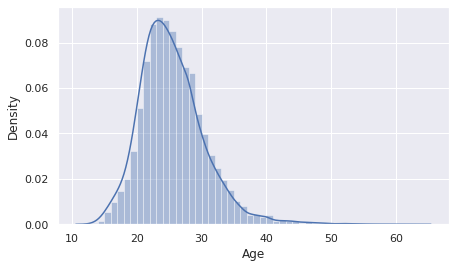

In [55]:
df_gold = df[df['Medal'] == 'Gold']
plt.style.use('ggplot')
sns.set(rc={"figure.figsize":(7, 4)})
sns.distplot(df_gold.Age)

A distribuição das idades dos atletas com medalha de ouro difere sutilmente da distribuição das idades dos atletas olímpicos em geral. A ausência do pico dos trinta anos pode indicar que a decisão de adiar a aposentadoria para uma idade específica não faz com que o número de medalhas de ouro desse grupo de pessoas destoe da linha de tendência. Isso pode nos dizer que o desejo de parar de competir com uma idade 'redonda' é puramente arbitrário e não acarreta o prolongamento do auge físico do atleta.
Um nadador com 29 anos, por exemplo, já é capaz de perceber um prejuízo na sua força corpórea, de forma que seu desempenho se mostra bastante prejudicado e suas chances de ganhar o ouro, bastante reduzidas. Apesar disso, o atleta aguarda mais um ano para encerrar sua carreira com o objetivo de completar os trinta anos.

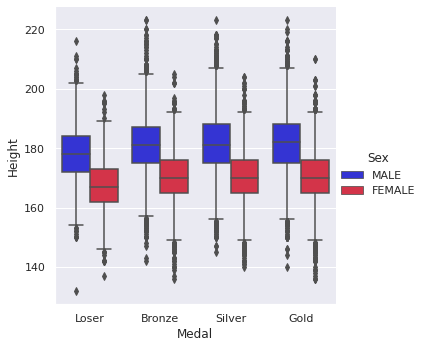

In [56]:
plt.style.use('ggplot')
sns.set(rc={"figure.figsize":(8, 8)})
sns.catplot(x='Medal', y='Height', hue='Sex', order=['Loser', 'Bronze', 'Silver', 'Gold'], kind='box', 
            data=df, palette=["#1919EE", '#EE1935'])

No gráfico acima, podemos perceber um padrão bastante interessante. Tanto em homens quanto em mulheres, existe uma sutil diferença na altura dos atletas perdedores e os atletas medalistas: aqueles que subiram ao pódio tendem a ser alguns centímetros mais altos. Todavia, entre os que ganharam medalhas não existe uma diferença de altura relevante. Possivelmente isso deve ao fato de que o desempenho esportivo dos medalistas é muito próximo. 

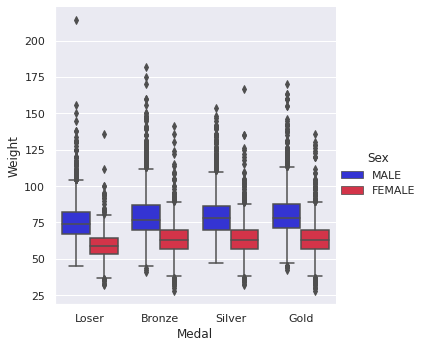

In [57]:
sns.set(rc={"figure.figsize":(8, 16)})
sns.catplot(x='Medal', y='Weight', hue='Sex', order=['Loser', 'Bronze', 'Silver', 'Gold'], 
            kind='box', data=df, palette=["#1919EE", '#EE1935'])

A distribuição do peso dos atletas se assemelha ao padrão de distribuição das alturas. Esse fato nos leva a crer que as características físicas dos atletas são bastante importantes para predizer suas chances de chegar ao pódio, mas não são tão relevantes para distinguir entre o ouro, a prata e o bronze. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


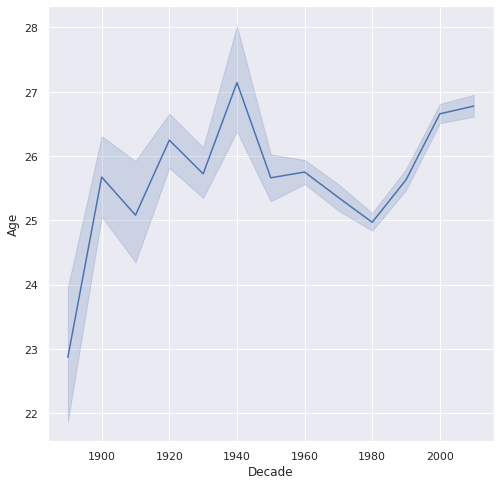

In [58]:
df_male = df[df['Sex'] == 'MALE']
sns.set(rc={"figure.figsize":(8, 8)})
sns.lineplot('Decade', 'Age', data=df_male)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


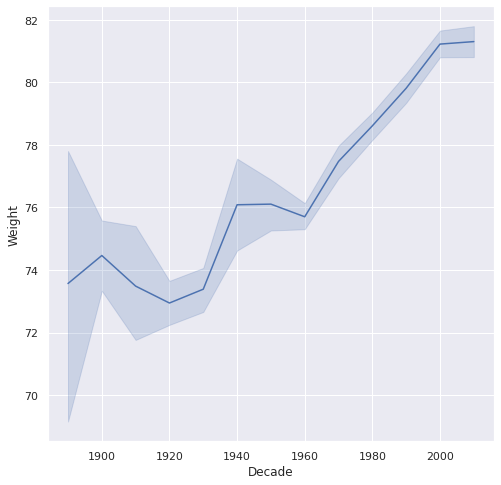

In [59]:
sns.set(rc={"figure.figsize":(8, 8)})
sns.lineplot('Decade', 'Weight', data=df_male)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


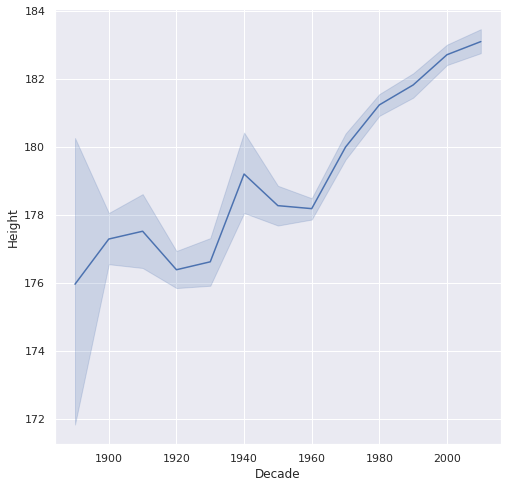

In [60]:
sns.set(rc={"figure.figsize":(8, 8)})
sns.lineplot('Decade', 'Height', data=df_male)

Os três gráficos acima apresentam a evolução do perfil de idade, peso e altura dos atletas do sexo masculino ao longo dos diversos Jogos Olímpicos. Na elaboração desses gráficos, optou-se por incluir apenas os atletas homens, uma vez que a participação relativa dos sexos masculino e feminino não é constante nas diferentes edições das Olimpíadas, e a maior participação das mulheres nos Jogos Olímpicos mais recentes (tema a ser abordado adiante) poderia atrapalhar a análise. 
O primeiro gráfico dos três aponta uma variação sutil da idade dos atletas, não havendo uma tendência clara.
Por outro lado, os gráficos de peso e altura nos mostram que essas características dos atletas tenderam a aumentar ao longo dos jogos. Uma possível explicação para isso reside no fato de que o aumento do nível esportivo da competição acarretou a seleção dos biotipos mais propícios aos alto desempenho. No caso, foram selecionadas pessoas altas e pesadas (com elavada massa muscular). 


# Análise das modalidades esportivas

Nesta seção, serão analisadas cinco modalidades esportivas das Olimpíadas. Diante da impossibilidade de se analisar detalhadamente as 57 modalidades contidas no dataframe, optou-se pela seleção das cinco mais importantes. O critério para essa seleção foi o número de medalhas das modalidades.

In [61]:
# cria coluna 'IMC' com o indice de massa corporea dos atletas
df['IMC'] = df['Weight'] / (df['Height'] / 100) ** 2

# cria o df apenas com atletas medalistas
df_medalistas = df[df['Medal'] != 'Loser']

# nos fornece as modalidades esportivas com maior numero de medalhas nos Jogos
df_medalistas['Sport'].value_counts()[:5]

Athletics     3522
Swimming      2442
Rowing        2066
Ice Hockey    1276
Fencing       1179
Name: Sport, dtype: int64

In [62]:
# cria diferentes df apenas com os medalistas de cada modalidade
df_Athletics = df_medalistas[df_medalistas['Sport'] == 'Athletics']
df_Swimming = df_medalistas[df_medalistas['Sport'] == 'Swimming']
df_Rowing = df_medalistas[df_medalistas['Sport'] == 'Rowing']
df_IceHockey = df_medalistas[df_medalistas['Sport'] == 'Ice Hockey']
df_Fencing  = df_medalistas[df_medalistas['Sport'] == 'Fencing']

# cria um df apenas com os atletas dessas cinco modalidades
df_Top5 = pd.concat([df_Athletics, df_Swimming, df_Rowing, df_IceHockey, df_Fencing])

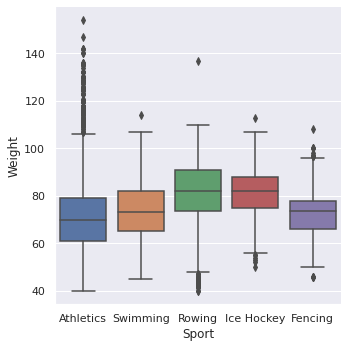

In [63]:
sns.set(rc={"figure.figsize":(8, 16)})
sns.catplot(x='Sport', y='Weight', kind='box', data=df_Top5)

No gráfico acima pode-se perceber diferença de peso dos atletas de cada uma dessas cinco modalidades. Nota-se que o remo e o hockey de gelo selecionam atletas consideravelmente mais pesados do que os outros três esportes. Isso deve indicar uma possível vantagem às pessoas mais pesadas praticantes desses esportes. 
Além disso, chama a atenção o número de outliers no gráfico referente ao atletismo. Uma possível explicação para isso é a existência de uma gama de modalidades bastante diferentes dentro da categoria do atletismo. Assim, os arremessadores de peso, que tem uma massa corpórea muito superior aos corredores, tendem a ser tratados como outliers. 

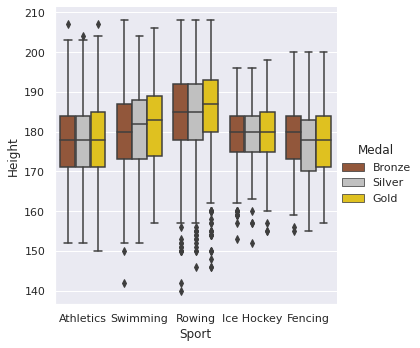

In [64]:
sns.set(rc={"figure.figsize":(8, 16)})
sns.catplot(x='Sport', y='Height', hue='Medal', hue_order=['Bronze', 'Silver', 'Gold'],
            kind='box', data=df_Top5, palette=['sienna', 'silver', 'gold'])

No gráfico acima, podemos observar não apenas a diferença de altura entre os atletas das cinco modalidades mas também o padrão de altura dentro do pódio. Com excessão da natação, do remo e da esgrima, a altura dos medalistas não varia substancialmente. 
Na natação e no remo, contudo, percebe-se uma correlação entre a o resultado do atleta e sua altura: quanto mais alto ele é, melhor tende a ser a sua medalha. 
Na esgrima, por outro lado, a relação se inverte e a maior altura está associada a um pior resultado. 

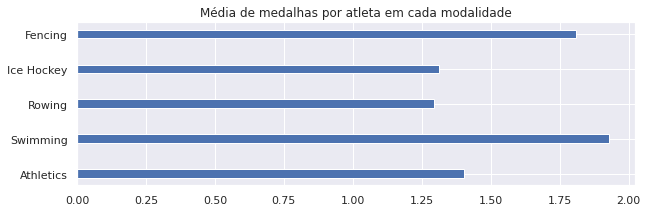

In [66]:
# obtem a media de medalhas por atleta de cada modalidade
media_medalhas_Athletics = len(df_Athletics) / len(df_Athletics.Name.unique())
media_medalhas_Swimming = len(df_Swimming) / len(df_Swimming.Name.unique())
media_medalhas_Rowing = len(df_Rowing) / len(df_Rowing.Name.unique())
media_medalhas_IceHockey = len(df_IceHockey) / len(df_IceHockey.Name.unique())
media_medalhas_Fencing = len(df_Fencing) / len(df_Fencing.Name.unique())

# cria dois arrays (um para cada eixo do grafico)
media_medalhas = [media_medalhas_Athletics, media_medalhas_Swimming, media_medalhas_Rowing,
                  media_medalhas_IceHockey, media_medalhas_Fencing]
esportes = ['Athletics', 'Swimming', 'Rowing', 'Ice Hockey', 'Fencing']

# plota o grafico
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
ax.barh(esportes, media_medalhas, align='center', height=.25)
ax.set_title('Média de medalhas por atleta em cada modalidade')
plt.show()


O gráfico acima mostra o numero medio de medalhas por atleta em cada uma das cinco modalidades. A maior media de medalhas para natação e para esgrima se devem à possibilidade de o atleta conquistar várias medalhas dentro da competição.
Na natação, por exemplo, o esportista pode competir em um total de 17 provas, que variam em distância e estilo. Na esgrima, os atletas podem competir na categorias individual ou em grupo e com três tipos diferentes de espada. 
Embora o atlestismo também tenha essa possibilidade de múltiplas medalhas, cada uma das provas do atletismo tem um tipo de treinamento bastante específico, o que implica a especialização dos atletas.

# Análise histórica dos jogos



Nesta seção, será analisada a evolução histórica dos Jogos Olímpicos com um enfoque sobre a participação dos diferentes países e dos diferentes gêneros nesse evento esportivo, a fim de se encontrar um paralelo entre as mudanças na sociedade e na organização das Olímpíadas. Afinal, será que as mudanças geopolíticas tem implicações sobre o esporte?

In [67]:
# cria um df apenas com os atletas do basket americano masculino de 2012
df_basket = df[df['Sport'] == 'Basketball']
df_basket = df_basket[df_basket['Year'] == 2012]
df_basket = df_basket[df_basket['Sex'] == 'MALE']
df_basket = df_basket[df_basket['NOC'] == 'USA']

# encontra o tamanho do df criado
len(df_basket)

12

A cédula acima nos apresenta um possível problema da análise a ser realizada. Como constatado, para os esportes coletivos, como o basketball, o df contabiliza uma medalha para cada integrante do time. Dessa forma, o método utilizado adiante de contar o número de medalhas obtido por cada país irá atribuir várias medalhas a cada vitória em esporte coletivo. Por isso, as nações especialmente boas nesses esportes terão sua contagem de medalhas superestimadas.

In [68]:
# cria três df, um para cada período descrito

# periodo de 1896-1945
df_periodo1 = df_gold[df_gold['Year'] <= 1945]

# periodo de 1945-1992
df_periodo2 = df_gold[df_gold['Year'] > 1945]
df_periodo2 = df_periodo2[df_periodo2['Year'] <= 1992]

# periodo de 1992-2016
df_periodo3 = df_gold[df_gold['Year'] > 1992]

A divisão realizada acima divide a história em três momentos específicos:

1.   antes da Segunda Guerra Mundial
2.   Guerra Fria
3.   Nova ordem mundial





Text(0, 0.5, 'país')

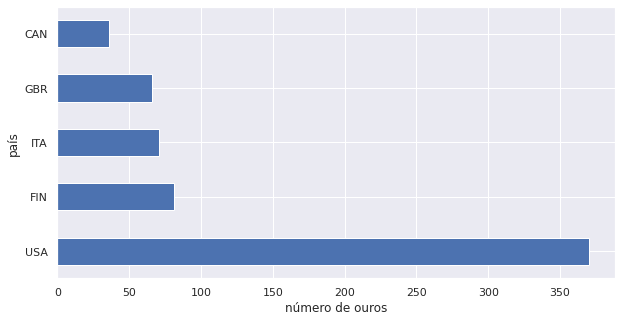

In [69]:
plt.figure (figsize=(10,5))
ax = df_periodo1['NOC'].value_counts()[:5].plot.barh()
ax.set_xlabel('número de ouros')
ax.set_ylabel('país')


O grafico acima representa o quadro de medalhas referente ao periodo 1 (de 1896 até 1945). A hegemonia estadunidense estabelecida no cenário geopolítico após a Primeira Guerra já mostra reflexos na hegemonia esportiva desse país, que, desde então, utiliza o esporte como uma espécie de retórica do poder. 
Deve-se notar que o cenário de destruição e crise econômica da Europa no período entre-guerras trouxe graves consequências para o resultado dessas nações no esporte. Afinal, a geração de homens perdida no conflito militar encerrado em 1914 reduziu a drasticamente a população jovem dos países europeus, impedindo-os de se consagrar no esporte. 

Text(0, 0.5, 'país')

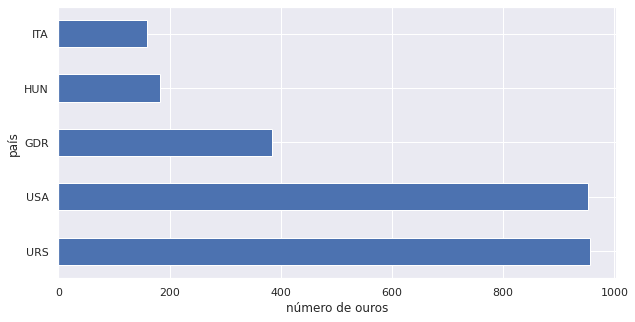

In [70]:
plt.figure (figsize=(10,5))
ax = df_periodo2['NOC'].value_counts()[:5].plot.barh()
ax.set_xlabel('número de ouros')
ax.set_ylabel('país')


O quadro de medalhas acima nos mostra os resultados dos cinco principais medalistas no período de 1945 até 1992. Esse gráfico sintetiza de forma bastante acurada a realidade bipolar desse período histórico, em que o enfrentamento da potência capitalista (USA) e da socialista (URS) encontrou no esporte uma das suas manifestações mais claras. 

Text(0, 0.5, 'país')

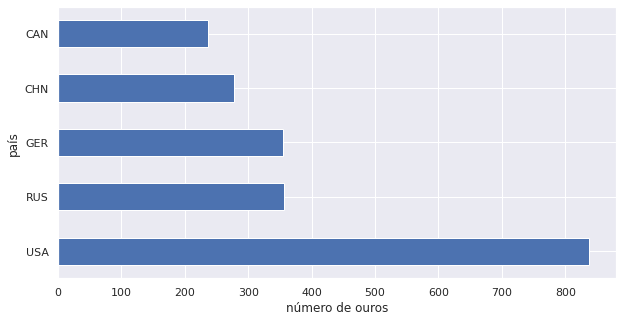

In [71]:
plt.figure (figsize=(10,5))
ax = df_periodo3['NOC'].value_counts()[:5].plot.barh()
ax.set_xlabel('número de ouros')
ax.set_ylabel('país')


O gráfico acima representa o último periodo da historia dos jogos olimpicos. Nele percebe-se que a crise do bloco soviético nos fins do século XX conferiram grande vantagem aos EUA, que consolidaram sua hegemonia não apenas na realidadee geopolítica mas também no universo esportivo. 
Deve-se destacar também a crescente importância da China no cenário econômico global, a qual vem acompanhada pelo aumento da relevância esportiva do país asiático.


Assim, a sequência dos três gráficos acima comprova a existência de um paralelo bastante claro entre a realidade geopolítica e o quadro de medalhas dos Jogos Olímpicos.

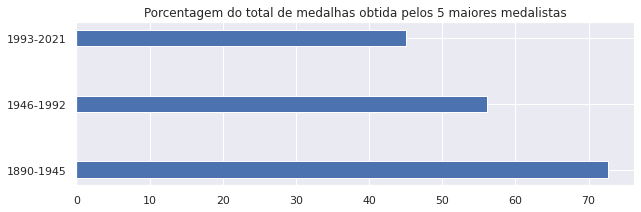

In [72]:
# printa a porcentagem do total de medalhas obtida pelas cinco princiapis equipe em cada periodo
porcentagem_periodo1 = 100*df_periodo1.NOC.value_counts()[:5].sum()/df_periodo1.NOC.value_counts().sum()
porcentagem_periodo2 = 100*df_periodo2.NOC.value_counts()[:5].sum()/df_periodo2.NOC.value_counts().sum()
porcentagem_periodo3 = 100*df_periodo3.NOC.value_counts()[:5].sum()/df_periodo3.NOC.value_counts().sum()

# cria dois arrays (um para cada eixo do grafico)
porcentagens = [porcentagem_periodo1, porcentagem_periodo2, porcentagem_periodo3]
periodos = ['1890-1945', '1946-1992', '1993-2021']

# plota o grafico
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
ax.barh(periodos, porcentagens, align='center', height=.25)
ax.set_title('Porcentagem do total de medalhas obtida pelos 5 maiores medalistas')
plt.show()

O gráfico acima busca caracterizar o grau de concentração de medalhas por periodo histórico. Pode-se observar que no primeiro período os cinco principais paises detinham cerca de 70% do total de medalhas de ouro das olimpíadas. Esse numero caiu até um valor aproximado de 45% no terceiro período estudado. Assim, pode-se concluir que os jogos mais recentes foram marcados pela participação e pela vitória de atletas de um maior número de países. Ou seja, o esporte tem se tornado menos concentrado e está se tornando cotidiano da população de mais regiões do planeta.

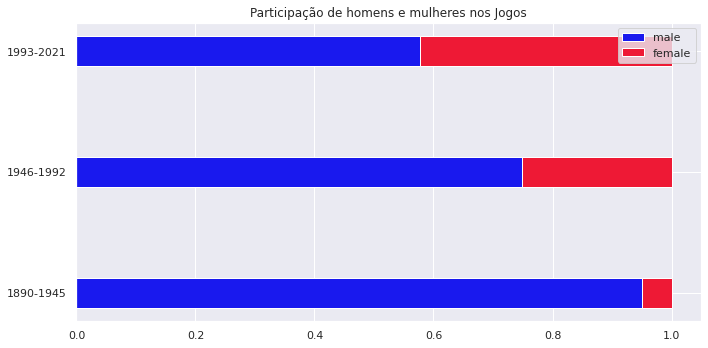

In [73]:
# obtem a porcentagem de atletas homens
porcentagem_male1 = df_periodo1['Sex'].value_counts()[0] / df_periodo1['Sex'].value_counts().sum()
porcentagem_male2 = df_periodo2['Sex'].value_counts()[0] / df_periodo2['Sex'].value_counts().sum()
porcentagem_male3 = df_periodo3['Sex'].value_counts()[0] / df_periodo3['Sex'].value_counts().sum()

#obtem a porcentagem atletas mulheres
porcentagem_female1 = 1 - porcentagem_male1
porcentagem_female2 = 1 - porcentagem_male2
porcentagem_female3 = 1 - porcentagem_male3

# cria três arrays para serem plotados no grafico
periodos = ['1890-1945', '1946-1992', '1993-2021']
porcentagens_female = [porcentagem_female1, porcentagem_female2, porcentagem_female3]
porecentagens_male = [porcentagem_male1, porcentagem_male2, porcentagem_male3]

# plota o grafico
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.barh(periodos, porecentagens_male, align='center', height=.25, color='#1919EE',label='male')
ax.barh(periodos, porcentagens_female, align='center', height=.25, left=porecentagens_male, color='#EE1935' ,label='female')
ax.set_yticks(periodos)
ax.set_title('Participação de homens e mulheres nos Jogos')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

Por fim, o gráfico acima representa o aumento da participação feminina nos Jogos Olímpicos nos três periodos analisados. Desde o princípio do século vinte até a atualidade, as mulheres conquistaram um espaço cada vez maior no esporte, que nas últimas décadas deixou de ser uma atividade monopolizada pelo sexo masculino. 
Assim, pode-se perceber mais uma vez que as mudanças sociais e históricas na sociedade têm intensas implicações sobre a realidade do esporte e, por decorrência, sobre a organização das Olimpíadas. 